# Database: `BusinessDB`

## Tables Structures:

#### **Table: `Customers`**

| Column      | Data Type        | Constraints               |
|-------------|------------------|---------------------------|
| customer_id  | INT             | PRIMARY KEY, AUTO_INCREMENT |
| name       | VARCHAR(100)   | NOT NULL                |
| email      | VARCHAR(100)   | UNIQUE, NOT NULL      |
| phone      | VARCHAR(15)    | NOT NULL                |
| city       | VARCHAR(50)    |                           |

#### **Table: `Products`**

| Column      | Data Type        | Constraints               |
|-------------|------------------|---------------------------|
| product_id   | INT             | PRIMARY KEY, AUTO_INCREMENT |
| name        | VARCHAR(100)   | NOT NULL                |
| price       | DECIMAL(10, 2) | NOT NULL                |
| category    | VARCHAR(50)    |                           |
| stock_quantity | INT          |                           |

#### **Table: `Orders`**

| Column        | Data Type        | Constraints                |
|---------------|------------------|----------------------------|
| order_id    | INT            | PRIMARY KEY, AUTO_INCREMENT |
| order_date  | DATE           | NOT NULL                 |
| customer_id | INT            | FOREIGN KEY (customer_id) |
| employee_id | INT            | FOREIGN KEY (employee_id) |

#### **Table: `OrderDetails`**

| Column        | Data Type        | Constraints               |
|---------------|------------------|---------------------------|
| detail_id   | INT            | PRIMARY KEY, AUTO_INCREMENT |
| order_id    | INT            | FOREIGN KEY (order_id)   |
| product_id  | INT            | FOREIGN KEY (product_id) |
| quantity    | INT            | NOT NULL                |

#### **Table: `Employees`**

| Column        | Data Type        | Constraints               |
|---------------|------------------|---------------------------|
| employee_id | INT            | PRIMARY KEY, AUTO_INCREMENT |
| name        | VARCHAR(100)   | NOT NULL                |
| position    | VARCHAR(50)    |                           |
| salary      | DECIMAL(10, 2) |                           |
| hire_date   | DATE           |                           |

---

## Diagram
- Go to `Database` tab and click on `Reverse Engineer`.
- Connect to server by providing details and click on `Next`. 
- Select the database and click on `Next`.
- At last, check the option `Place imported objects on a diagram` and click on `Execute`.
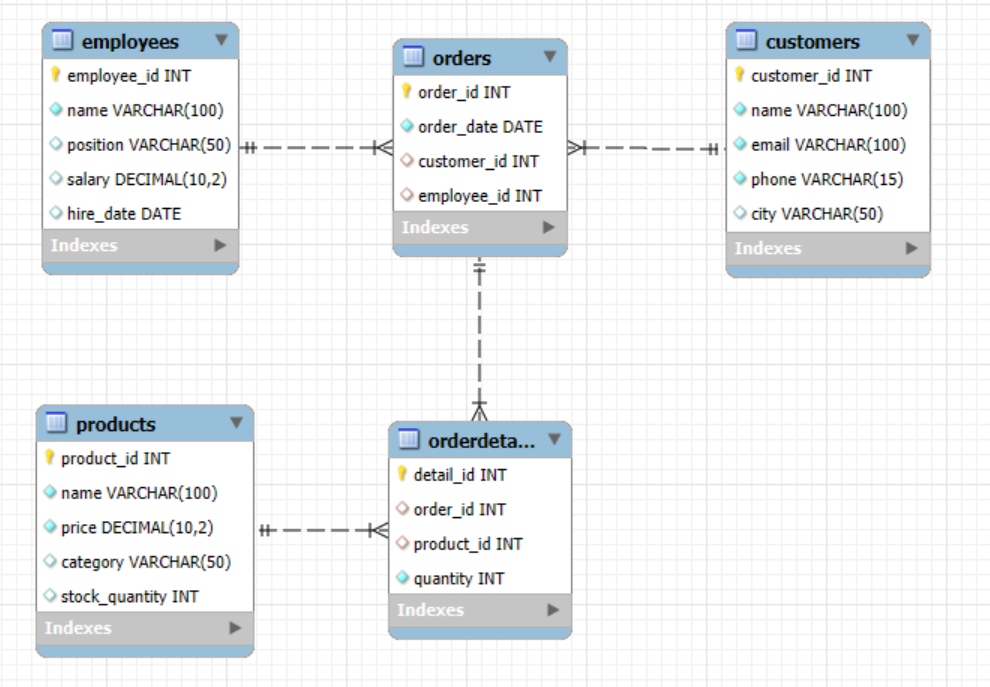

## 2. SQL Table Creation:

In [ ]:
CREATE DATABASE BusinessDB;

USE BusinessDB;

CREATE TABLE Customers (
  customer_id INT AUTO_INCREMENT,
  name VARCHAR(100) NOT NULL,
  email VARCHAR(100) UNIQUE NOT NULL,
  phone VARCHAR(15) NOT NULL,
  city VARCHAR(50),
  PRIMARY KEY (customer_id)
);

CREATE TABLE Products (
  product_id INT AUTO_INCREMENT,
  name VARCHAR(100) NOT NULL,
  price DECIMAL(10, 2) NOT NULL,
  category VARCHAR(50),
  stock_quantity INT,
  PRIMARY KEY (product_id)
);

CREATE TABLE Orders (
  order_id INT AUTO_INCREMENT,
  order_date DATE NOT NULL,
  customer_id INT,
  employee_id INT,
  PRIMARY KEY (order_id),
  FOREIGN KEY (customer_id) REFERENCES Customers(customer_id),
  FOREIGN KEY (employee_id) REFERENCES Employees(employee_id)
);

CREATE TABLE OrderDetails (
  detail_id INT AUTO_INCREMENT,
  order_id INT,
  product_id INT,
  quantity INT NOT NULL,
  PRIMARY KEY (detail_id),
  FOREIGN KEY (order_id) REFERENCES Orders(order_id),
  FOREIGN KEY (product_id) REFERENCES Products(product_id)
);

CREATE TABLE Employees (
  employee_id INT AUTO_INCREMENT,
  name VARCHAR(100) NOT NULL,
  position VARCHAR(50),
  salary DECIMAL(10, 2),
  hire_date DATE,
  PRIMARY KEY (employee_id)
);


### 3. Python Script to Insert Data

In [1]:
import mysql.connector
from datetime import date
import random
from faker import Faker
from credentials import host, user, password, database

# Initialize Faker
fake = Faker()

# Connect to MySQL
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = connection.cursor()

# Clean the existing data
cursor.execute("DELETE FROM OrderDetails")
cursor.execute("DELETE FROM Orders")
cursor.execute("DELETE FROM Products")
cursor.execute("DELETE FROM Employees")
cursor.execute("DELETE FROM Customers")

# Commit the changes after cleaning
connection.commit()

# Insert new data into Customers
customers = []
for _ in range(10):
    name = fake.name()
    email = fake.email()
    phone = fake.msisdn()[:15]  # Generates a phone number with max length of 15
    city = fake.city()
    customers.append((name, email, phone, city))

customer_query = "INSERT INTO Customers (name, email, phone, city) VALUES (%s, %s, %s, %s)"
cursor.executemany(customer_query, customers)

# Insert new data into Employees
employees = []
positions = ["Manager", "Salesperson", "Developer", "HR", "Analyst"]
for i in range(5):
    name = fake.name()
    position = positions[i % len(positions)]  # Rotate through the list of positions
    salary = random.randint(40000, 100000)
    hire_date = fake.date_between(start_date="-5y", end_date="today")  # Random date from the past 5 years
    employees.append((name, position, salary, hire_date))

employee_query = "INSERT INTO Employees (name, position, salary, hire_date) VALUES (%s, %s, %s, %s)"
cursor.executemany(employee_query, employees)

# Insert data into Products
products = [
    ("Laptop", 800.00, "Electronics", 50),
    ("Smartphone", 600.00, "Electronics", 100),
    ("Table", 150.00, "Furniture", 20),
    ("Chair", 75.00, "Furniture", 50),
    ("Monitor", 300.00, "Electronics", 40),
]
product_query = "INSERT INTO Products (name, price, category, stock_quantity) VALUES (%s, %s, %s, %s)"
cursor.executemany(product_query, products)

# Fetch the IDs of the customers, employees, and products that were inserted
cursor.execute("SELECT customer_id FROM Customers")
customer_ids = [row[0] for row in cursor.fetchall()]

cursor.execute("SELECT employee_id FROM Employees")
employee_ids = [row[0] for row in cursor.fetchall()]

cursor.execute("SELECT product_id FROM Products")
product_ids = [row[0] for row in cursor.fetchall()]  # Fetch actual product IDs

# Insert 20-30 orders dynamically
orders = []
for _ in range(random.randint(20, 30)):  # Randomly choose between 20 and 30 orders
    order_date = fake.date_between(start_date="-1y", end_date="today")
    customer_id = random.choice(customer_ids)  # Choose from actual inserted customer IDs
    employee_id = random.choice(employee_ids)  # Choose from actual inserted employee IDs
    orders.append((order_date, customer_id, employee_id))

order_query = "INSERT INTO Orders (order_date, customer_id, employee_id) VALUES (%s, %s, %s)"
cursor.executemany(order_query, orders)

# Fetch the inserted order IDs
cursor.execute("SELECT order_id FROM Orders")
order_ids = [row[0] for row in cursor.fetchall()]

# Insert OrderDetails based on the actual inserted order IDs and product IDs
order_details = []
for order_id in order_ids:
    # For each order, create between 1 and 3 order details
    for _ in range(random.randint(1, 3)):
        product_id = random.choice(product_ids)  # Choose from actual inserted product IDs
        quantity = random.randint(1, 5)
        order_details.append((order_id, product_id, quantity))  # Use the actual order ID and product ID

order_details_query = "INSERT INTO OrderDetails (order_id, product_id, quantity) VALUES (%s, %s, %s)"
cursor.executemany(order_details_query, order_details)

# Commit the transaction
connection.commit()

# Close the connection
cursor.close()
connection.close()